# **Fonksiyonlar-2**

**filter() fonksiyonu adından da anlaşıldığı üzere filtreleme yapmak için kullanılır. Örneğin;**

Veri düzenleme, başlı başına üzerinde uzmanlaşılması gereken ayrı bir konudur. R’a aktarılan veriler ile analizler gerçekleştirmeden önce genellikle verinin düzenlenmesi gerekir. Bu düzenleme (manipülasyon) pek çok anlama gelebilir. Bu aşamada veri seti alt veri setlerine ayrılabilir, verinin bir bölümü seçilebilir, veri başka veriler ile birleştirilebilir… Veri düzenleme, veri analizi ve görselleştirme için önemli bir konu olduğu için pek çok kişi bu konuya kafa yormuştur ve R’da veri düzenleme yaparken kullanılmak üzere pek çok paket geliştirilmiştir. Bu bölümde Wickham, François, Henry, Müller ve Vaughan (2023) tarafından geliştirilmiş olan dplyr paketindeki fonksiyonlardan yararlanılacaktır. Bu kapsamlı ve oldukça kullanışlı paket hakkında detaylı bilgiye ulaşmak için buraya tıklayabilirsiniz. Paketi indirmek için öncelikle install.packages("dplyr") komutunu çalıştırıyoruz, ardından aşağıdaki komut ile paketi çalışır hale getiriyoruz.

In [1]:
library(dplyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Örnek uygulama için bize bir veri seti lazım. Bu noktada ‘İçe ve Dışa Aktarma’ bölümünde gördüğümüz fonksiyonlardan yararlanarak internetteki bir veri setini içe aktaralım. Bu veri seti Türkiye’deki ilköğretim ve ortaöğretim öğrenci istatistiklerini içermektedir. 357 değişkenden ve 81 satırdan (iller) oluşmaktadır. Değişken isimleri ile ilgili açıklamalara buraya tıklayarak ulaşabilirsiniz.

In [2]:
library(readr)
TR_stu <- read_csv("https://raw.githubusercontent.com/gungorMetehan/TREduData/main/TREduData_student.csv")

Rows: 81 Columns: 357
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): province_upper, NUTS_level1, NUTS_level1_name, NUTS_level2
dbl (353): gadm_L3number, plate_number, metropolitan, student_s_pre_m_21_22,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


İndirilen veri seti, R’a TR_stu olarak kaydedilmiştir. Veri setine genel bir bakış atmak için glimpse() fonksiyonundan yararlanılabilir.

In [3]:
#glimpse(TR_stu)

Oldukça uzun bir liste geldi. Zaten çıktının başında da veri setinde 81 satırın (iller) ve 357 sütunun (değişkenler) bulunduğu bilgisi yer alıyor. Bu bölümde bu veri setinden yararlanacağız. Ancak öncesinde küçük bir düzenleme yapalım. Örneğin plaka numaraları (plate_number) değişkeni karakter tipinde görünüyor. Bunu faktör olarak değiştirmek gerekmektedir. Buna benzer şekilde diğer karakter türündeki değişkenler de aslında birer faktör. Aşağıdaki satır komutlarını çalıştırarak karakter türündeki tüm verileri faktöre çevirebiliriz.

In [4]:
TR_stu <- TR_stu |>
  mutate_if(is.character, as.factor)

Bu işlemin ardından son bir düzenleme daha yapmamız gerek. O da gadm_L3number ve metropolitan değişkenlerinin de faktöre dönüştürülmesi. Çünkü bu değişkenler R’a aktarılırken double tipinde aktarılmıştır. Bu düzenleme için aşağıdaki satır komutları çalıştırılabilir.

In [5]:
TR_stu <- TR_stu |>
  mutate_at(c("gadm_L3number", "metropolitan"), as.factor)

Uygulamalara geçmeden önce dplyr fonksiyonlarının ortak özelliklerini bilmek faydalı olabilir:
Bu fonksiyonların ilk argümanları her zaman data frame’dir.
Sonraki argümanlar genellikle değişken adlarını kullanarak (tırnak işareti içine almadan) hangi sütunlarla çalışılacağını ifade eder.
Çıktı her zaman yeni bir data frame’dir (Wickham, Çetinkaya-Rundel ve Grolemund, 2023).
dplyr paketindeki fonksiyonları birbirine bağlamak için ‘pipe’ adı verilen bir bağlantı operatörü kullanılmaktadır. Eskiden bu operatör %>% şeklinde iken artık |> şeklinde kullanılmaktadır. Bu operatör ile soldaki veri ya da fonksiyonun çıktısı alınıp sağdaki işlemin yapılması istenir. Temelde, şu şekilde ifade edilebilir: x |> f(y) ifadesi f(x, y) anlamına gelir. Benzer şekilde x |> f(y) |> g(z) de g(f(x, y), z) anlamına gelir. Açıklamaları bir kenara bırakalım, operatör ile ne yapıldığını satır komutları üzerinden görelim.

In [6]:
TR_stu |>
  filter(metropolitan == 1)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,TR62,1,22426,21309,43735,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
7,6,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,76044,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,7,ANTALYA,TR6,Akdeniz,TR61,1,23178,21968,45146,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
11,9,AYDIN,TR3,Ege,TR32,1,9907,9351,19258,⋯,3555,7366,192324,94111,89918,184029,3421,3002,6423,190452
12,10,BALIKESIR,TR2,Bati Marmara,TR22,1,8433,8093,16526,⋯,2737,5921,203042,101121,97322,198443,3131,2558,5689,204132
21,16,BURSA,TR4,Dogu Marmara,TR41,1,23234,21894,45128,⋯,12389,26306,571295,275538,258890,534428,12303,10672,22975,557403
25,20,DENIZLI,TR3,Ege,TR32,1,9313,8927,18240,⋯,3678,7497,196393,95583,91889,187472,3055,2839,5894,193366
26,21,DIYARBAKIR,TRC,Guneydogu Anadolu,TRC2,1,25021,23239,48260,⋯,4095,9515,504982,250724,233981,484705,4815,3606,8421,493126
31,25,ERZURUM,TRA,Kuzeydogu Anadolu,TRA1,1,8613,8189,16802,⋯,1951,4246,199689,100547,93777,194324,2147,1774,3921,198245


Hatırlayacağınız üzere veri setinde 81 satır vardı. metropolitan değişkeni büyükşehir olma durumunu göstermekte. Bu değerin 1 olduğu – yani büyükşehir – durumların filtrelenmesi için filter() fonksiyonundan yararlanılmıştır. Bu örnekte satır komutunun en solunda veri setinin adı bulunmakta, ardından |> operatörü ile bu veri setine ne yapılmasını istediğimizi göstermek için bağlantı kuruyoruz. Ardından filter() fonksiyonu ile satırları filtreledik. Bu komutlar çalıştırıldığında yeni bir veri seti çıktı olarak sunulacaktır. Ancak unutulmamalıdır ki, bu veri seti (sadece büyükşehirlerden oluşan) herhangi bir yere kaydedilmemiştir. Eğer bu çıktı (yeni veri seti) kaydedilmek isteniyorsa daha önce öğrendiğimiz gibi <- atama operatörü ile çıktıyı bir nesneye atayabiliriz.

In [7]:
TR_stu2 <- TR_stu |>
  filter(metropolitan == 1)

In [8]:
#filter() fonksiyonu adından da anlaşıldığı üzere filtreleme yapmak için kullanılır. Örneğin;
TR_stu |>
  filter(student_s_pre_total_21_22 > 15000)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,TR62,1,22426,21309,43735,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
7,6,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,76044,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,7,ANTALYA,TR6,Akdeniz,TR61,1,23178,21968,45146,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
11,9,AYDIN,TR3,Ege,TR32,1,9907,9351,19258,⋯,3555,7366,192324,94111,89918,184029,3421,3002,6423,190452
12,10,BALIKESIR,TR2,Bati Marmara,TR22,1,8433,8093,16526,⋯,2737,5921,203042,101121,97322,198443,3131,2558,5689,204132
14,72,BATMAN,TRC,Guneydogu Anadolu,TRC3,0,7998,7745,15743,⋯,1352,3415,188263,94639,86227,180866,1782,1142,2924,183790
21,16,BURSA,TR4,Dogu Marmara,TR41,1,23234,21894,45128,⋯,12389,26306,571295,275538,258890,534428,12303,10672,22975,557403
25,20,DENIZLI,TR3,Ege,TR32,1,9313,8927,18240,⋯,3678,7497,196393,95583,91889,187472,3055,2839,5894,193366


Bu komutlar çalıştırıldığında yeni bir veri seti oluşur ve bu veri seti yalnızca student_s_pre_total_21_22 değerinin 15000’den fazla olduğu satırları içerir (yani 2021-2022 eğitim yılında toplam devlet ana okulu öğrencisi sayısı 15000’den fazla olan şehirler). > (büyüktür) işareti haricinde >= (büyük veya eşittir), < (küçüktür), <= (küçük veya eşittir), == (eşittir) ve != (eşit değildir) sınamaları da yapılabilir. Bu sınamalar birlikte de kullanılabilir. Örneğin;

In [9]:
TR_stu |>
  filter(student_s_pre_total_21_22 > 15000 & metropolitan == 0)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
14,72,BATMAN,TRC,Guneydogu Anadolu,TRC3,0,7998,7745,15743,⋯,1352,3415,188263,94639,86227,180866,1782,1142,2924,183790
71,73,SIRNAK,TRC,Guneydogu Anadolu,TRC3,0,7715,7500,15215,⋯,366,949,170186,85808,75602,161410,486,278,764,162174


Bu komutlar ile iki özelliği birlikte sağlayan satırlar istenmiştir. Yani toplam öğrenci sayısı 15000’in üzerinde olan büyükşehir olmayan şehirler. Yalnızca 3 şehir listelenecektir (& sembolü yerine | sembolünü koyarak işlemi tekrarlayınız, çıktının neden 77 satır içerdiği üzerine düşününüz). %in% de oldukça kullanışlı bir semboldür. Aşağıdaki örneği inceleyiniz.

In [10]:
TR_stu |>
  filter(NUTS_level1 %in% c("TRA", "TRB", "TRC"))

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
4,4,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0,6835,6514,13349,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
9,75,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2,0,877,882,1759,⋯,36,75,23973,12810,11992,24802,10,3,13,24815
14,72,BATMAN,TRC,Guneydogu Anadolu,TRC3,0,7998,7745,15743,⋯,1352,3415,188263,94639,86227,180866,1782,1142,2924,183790
15,69,BAYBURT,TRA,Kuzeydogu Anadolu,TRA1,0,703,703,1406,⋯,57,135,17537,9116,8311,17427,37,22,59,17486
17,12,BINGOL,TRB,Ortadogu Anadolu,TRB1,0,2946,2749,5695,⋯,205,505,71219,36563,34061,70624,283,185,468,71092
18,13,BITLIS,TRB,Ortadogu Anadolu,TRB2,0,5147,4733,9880,⋯,218,479,108426,55569,48642,104211,268,209,477,104688
26,21,DIYARBAKIR,TRC,Guneydogu Anadolu,TRC2,1,25021,23239,48260,⋯,4095,9515,504982,250724,233981,484705,4815,3606,8421,493126
29,23,ELAZIG,TRB,Ortadogu Anadolu,TRB1,0,5110,4792,9902,⋯,1217,2777,135270,68709,65111,133820,1515,1091,2606,136426


Burada NUTS_level1 (istatistiki bölge birimleri sınıflandırması – düzey 1) değişkeninde TRA, TRB ve TRC değerlerini içeren satırlar ekrana getirilecektir. Bu şehirler 24 tanedir.

**arrange() Fonksiyonu**

arrange() fonksiyonu ile satırların sıralaması düzenlenebilir. Örneğin, TR_stu isimli veri seti gadm_L3number değişkenine göre sıralanmıştır. Oysa biz bunu plakalara (plate_number) sıralı halde görmek isteyebilir, bu şekilde düzenlenmiş bir veri seti ile çalışmak isteyebiliriz. Bunun için;

In [11]:
TR_stu |>
  arrange(plate_number)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,TR62,1,22426,21309,43735,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,3,AFYONKARAHISAR,TR3,Ege,TR33,0,6466,6157,12623,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,4,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0,6835,6514,13349,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
6,5,AMASYA,TR8,Bati Karadeniz,TR83,0,3048,2931,5979,⋯,808,1835,68482,34570,32500,67070,1028,819,1847,68917
7,6,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,76044,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,7,ANTALYA,TR6,Akdeniz,TR61,1,23178,21968,45146,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
10,8,ARTVIN,TR9,Dogu Karadeniz,TR90,0,1590,1495,3085,⋯,155,324,32265,16353,15868,32221,155,107,262,32483
11,9,AYDIN,TR3,Ege,TR32,1,9907,9351,19258,⋯,3555,7366,192324,94111,89918,184029,3421,3002,6423,190452


Sıralamanın 1’den 81’e doğru değil de tam tersi şekilde gitmesini istiyorsak, arrange() fonksiyonunu desc() fonksiyonu ile birlikte kullanabiliriz.

In [12]:
TR_stu |>
  arrange(desc(plate_number))

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,81,DUZCE,TR4,Dogu Marmara,TR42,0,4231,3877,8108,⋯,982,2044,75671,37448,36261,73709,917,794,1711,75420
64,80,OSMANIYE,TR6,Akdeniz,TR63,0,6799,6302,13101,⋯,1985,4337,129530,64123,60048,124171,2091,1694,3785,127956
48,79,KILIS,TRC,Guneydogu Anadolu,TRC1,0,2768,2727,5495,⋯,372,749,34707,17194,16502,33696,407,356,763,34459
43,78,KARABUK,TR8,Bati Karadeniz,TR81,0,1815,1731,3546,⋯,628,1308,41910,20769,19714,40483,639,561,1200,41683
79,77,YALOVA,TR4,Dogu Marmara,TR42,0,2553,2413,4966,⋯,1736,4074,347236,172141,158155,330296,1977,1442,3419,333715
38,76,IGDIR,TRA,Kuzeydogu Anadolu,TRA2,0,2920,2790,5710,⋯,281,696,55134,27676,26599,54275,214,148,362,54637
9,75,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2,0,877,882,1759,⋯,36,75,23973,12810,11992,24802,10,3,13,24815
13,74,BARTIN,TR8,Bati Karadeniz,TR81,0,1317,1279,2596,⋯,420,911,34451,17102,16560,33662,425,360,785,34447
71,73,SIRNAK,TRC,Guneydogu Anadolu,TRC3,0,7715,7500,15215,⋯,366,949,170186,85808,75602,161410,486,278,764,162174


Kısaca arrange() fonksiyonu ile veri setindeki satırların sıraları değiştirilebilir. Bu sırada veri seti değişmez, yani bir filtreleme söz konusu değildir.

##**distinct() Fonksiyonu**

distinct() fonksiyonu veri setinin satırlarındaki eşsiz (unique) değerleri listelemek için kullanılır. Örneğin TR_stu veri setimizde kaç tane istatistiki bölge birimleri bulunuyor, bunu görmek için aşağıdaki komutları çalıştırabiliriz.

In [13]:
TR_stu |>
  distinct(NUTS_level1_name)

NUTS_level1_name
<fct>
Akdeniz
Guneydogu Anadolu
Ege
Kuzeydogu Anadolu
Orta Anadolu
Bati Karadeniz
Bati Anadolu
Dogu Karadeniz
Bati Marmara


Görüldüğü üzere sonuç 12. distinct() fonksiyonu ilgili sütundaki değerleri inceler ve aynı olanlardan yalnızca bir tanesini (ilkini) ekrana getirir. Bu eşsizleştirme ile birlikte diğer sütunların kaybolduğunu fark etmişsinizdir. Bu sütunları da veri setinde tutmak istiyorsanız aşağıdaki komutları kullanabilirsiniz.

In [14]:
TR_stu |>
  distinct(NUTS_level1_name, .keep_all = TRUE)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,TR62,1,22426,21309,43735,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,3,AFYONKARAHISAR,TR3,Ege,TR33,0,6466,6157,12623,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,4,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0,6835,6514,13349,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
5,68,AKSARAY,TR7,Orta Anadolu,TR71,0,3844,3536,7380,⋯,944,2107,90900,44688,42602,87290,1027,837,1864,89154
6,5,AMASYA,TR8,Bati Karadeniz,TR83,0,3048,2931,5979,⋯,808,1835,68482,34570,32500,67070,1028,819,1847,68917
7,6,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,76044,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
10,8,ARTVIN,TR9,Dogu Karadeniz,TR90,0,1590,1495,3085,⋯,155,324,32265,16353,15868,32221,155,107,262,32483
12,10,BALIKESIR,TR2,Bati Marmara,TR22,1,8433,8093,16526,⋯,2737,5921,203042,101121,97322,198443,3131,2558,5689,204132


Bu durumda 12 satırın yanına veri setindeki tüm sütunlar eklenecektir. Ancak, başka herhangi bir işlem gerçekleştirilmediğini fark ediniz. Burada yalnızca 12 eşsiz NUTS_level1_name değeri listelenmekte ve bu değerlerin karşısındaki değerler yanlarına getirilmektedir. Tüm veri seti 81 satırdan oluşmakta idi. Yani, istatistiki bölgelerin kaç tane olduğundan habersiziz. Bu noktada count() fonksiyonu ile çakışmaların kaç adet olduğu listelenebilir.

In [15]:
TR_stu |>
  count(NUTS_level1_name)

NUTS_level1_name,n
<fct>,<int>
Akdeniz,8
Bati Anadolu,3
Bati Karadeniz,10
Bati Marmara,5
Dogu Karadeniz,6
Dogu Marmara,8
Ege,8
Guneydogu Anadolu,9
Istanbul,1


##**mutate() Fonksiyonu**

mutate() fonksiyonu ile veri setinde bulunan değişkenlerden veri seti için yeni değişkenler üretilebilir ve bu yeni değişkenler veri seti ile birleştirilebilir. Örneğin, TR_stu nesnesinde (veri setinde) yer alan 2021-2022 eğitim öğretim yılında devlet liselerinde eğitim gören erkek ve kız öğrencilerin toplam sayısı aşağıdaki komut ile hesaplanarak veri setine yeni bir değişken (toplam_devlet_lise) olarak eklenebilir.

In [16]:
TR_stu3 <- TR_stu |>
  mutate(toplam_devlet_lise = student_s_high_m_21_22 + student_s_high_f_21_22)

Bu veri setinde aslında bu toplam değer vardır. İşlemin doğru olup olmadığını anlamak için identical() fonksiyonu ile iki vektörün eş olup olmadığını test edebiliriz.

In [17]:
identical(TR_stu3$toplam_devlet_lise, TR_stu$student_s_high_total_21_22)

[1] TRUE

(TRUE) TR_stu3’te yer alan yeni değişken ile uygulama verisinde yer alan değişken birebir aynıdır.

mutate() fonksiyonu ile ilgilendiğimiz değişkenin veri setindeki pozisyonunu da değiştirebiliriz. Bunun için .before ve .after argümanları kullanılır.

In [18]:
TR_stu |>
  mutate(toplam_devlet_lise = student_s_high_m_21_22 + student_s_high_f_21_22,
         .before = province_upper)

gadm_L3number,plate_number,toplam_devlet_lise,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,172768,ADANA,TR6,Akdeniz,TR62,1,22426,21309,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,60541,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,3,48662,AFYONKARAHISAR,TR3,Ege,TR33,0,6466,6157,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,4,44904,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0,6835,6514,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
5,68,31798,AKSARAY,TR7,Orta Anadolu,TR71,0,3844,3536,⋯,944,2107,90900,44688,42602,87290,1027,837,1864,89154
6,5,22337,AMASYA,TR8,Bati Karadeniz,TR83,0,3048,2931,⋯,808,1835,68482,34570,32500,67070,1028,819,1847,68917
7,6,360809,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,7,176616,ANTALYA,TR6,Akdeniz,TR61,1,23178,21968,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
9,75,7611,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2,0,877,882,⋯,36,75,23973,12810,11992,24802,10,3,13,24815


Yeni üretilen değişken province_upper değişkeninin bir öncesine eklenmiştir.

In [19]:
TR_stu |>
  mutate(toplam_devlet_lise = student_s_high_m_21_22 + student_s_high_f_21_22,
         .after = NUTS_level1_name)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,toplam_devlet_lise,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,172768,TR62,1,22426,21309,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,60541,TRC1,0,8659,8078,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,3,AFYONKARAHISAR,TR3,Ege,48662,TR33,0,6466,6157,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,4,AGRI,TRA,Kuzeydogu Anadolu,44904,TRA2,0,6835,6514,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
5,68,AKSARAY,TR7,Orta Anadolu,31798,TR71,0,3844,3536,⋯,944,2107,90900,44688,42602,87290,1027,837,1864,89154
6,5,AMASYA,TR8,Bati Karadeniz,22337,TR83,0,3048,2931,⋯,808,1835,68482,34570,32500,67070,1028,819,1847,68917
7,6,ANKARA,TR5,Bati Anadolu,360809,TR51,1,38750,37294,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,7,ANTALYA,TR6,Akdeniz,176616,TR61,1,23178,21968,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
9,75,ARDAHAN,TRA,Kuzeydogu Anadolu,7611,TRA2,0,877,882,⋯,36,75,23973,12810,11992,24802,10,3,13,24815


Yeni üretilen değişken NUTS_level1_name değişkeninin bir sonrasına eklenmiştir. Bu fonksiyon ile aritmetik işlemler de yapılabilir. Örneğin, seçilen bir değişken 1000 sayısına bölünebilir (/) ya da değişkenin karesi (^2) alınabilir. Çıkarma işlemi (-) ya da toplama işlemi (+) yapılabilir.

##**select() Fonksiyonu**

select() fonksiyonu ile bir veri setindeki ilgilenilen değişkenler seçilebilir. Örneğin;

In [20]:
TR_stu |>
  select(plate_number, province_upper, student_all_total_21_22)

plate_number,province_upper,student_all_total_21_22
<dbl>,<fct>,<dbl>
1,ADANA,572664
2,ADIYAMAN,180532
3,AFYONKARAHISAR,151012
4,AGRI,156041
68,AKSARAY,96587
5,AMASYA,64467
6,ANKARA,1176294
7,ANTALYA,557063
75,ARDAHAN,19781


Yukarıdaki komutlar çalıştırıldığında, 3 değişkenden oluşan daha küçük bir veri seti elde edilecektir. Bu veri seti plaka numaralarını, şehir adlarını ve 2021-2022 eğitim yılındaki tüm öğrencilerin sayılarını (devlet okulları ve özel okullar, ana okulundan lise sona kadar) verecektir.

Değişken isimlerinin arasında : konarak bir seçilen iki sütun arasındaki tüm sütunlar birlikte ele alınabilir.

In [21]:
TR_stu |>
  select(plate_number:NUTS_level2)

plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2
<dbl>,<fct>,<fct>,<fct>,<fct>
1,ADANA,TR6,Akdeniz,TR62
2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1
3,AFYONKARAHISAR,TR3,Ege,TR33
4,AGRI,TRA,Kuzeydogu Anadolu,TRA2
68,AKSARAY,TR7,Orta Anadolu,TR71
5,AMASYA,TR8,Bati Karadeniz,TR83
6,ANKARA,TR5,Bati Anadolu,TR51
7,ANTALYA,TR6,Akdeniz,TR61
75,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2


Yukarıdaki satır komutları çalıştırıldığında plate_number’dan NUTS_level2’ye kadar olan tüm sütunlardan oluşan yeni bir veri seti üretilecektir.

In [22]:
TR_stu |>
  select(!plate_number:NUTS_level2)

gadm_L3number,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,student_p_pre_m_21_22,student_p_pre_f_21_22,student_p_pre_total_21_22,student_pre_total_21_22,student_s_pre_m_20_21,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,22426,21309,43735,4215,3557,7772,51507,13712,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,0,8659,8078,16737,766,583,1349,18086,5955,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,0,6466,6157,12623,1066,920,1986,14609,5017,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,0,6835,6514,13349,219,232,451,13800,5733,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
5,0,3844,3536,7380,584,437,1021,8401,3554,⋯,944,2107,90900,44688,42602,87290,1027,837,1864,89154
6,0,3048,2931,5979,656,545,1201,7180,2498,⋯,808,1835,68482,34570,32500,67070,1028,819,1847,68917
7,1,38750,37294,76044,19411,16747,36158,112202,20326,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,1,23178,21968,45146,10095,8675,18770,63916,17061,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
9,0,877,882,1759,73,59,132,1891,748,⋯,36,75,23973,12810,11992,24802,10,3,13,24815


İki değişken arasındaki değişkenler haricindeki diğer tüm değişkenleri seçmek için ise yukarıdaki satır komutlarını kullanabiliriz (! işareti R’da “değil” anlamında kullanılmaktadır).

select() fonksiyonu where() fonksiyonu ile birlikte kullanılan tek tipteki değişkenler seçilebilir.

In [23]:
TR_stu |>
  select(where(is.factor))

gadm_L3number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ADANA,TR6,Akdeniz,TR62,1
2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0
3,AFYONKARAHISAR,TR3,Ege,TR33,0
4,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0
5,AKSARAY,TR7,Orta Anadolu,TR71,0
6,AMASYA,TR8,Bati Karadeniz,TR83,0
7,ANKARA,TR5,Bati Anadolu,TR51,1
8,ANTALYA,TR6,Akdeniz,TR61,1
9,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2,0


Bu özellikler dışında, select() fonksiyonuna yardımcı fonksiyonlardan oldukça yararlı olabilir. Örneğin starts_with() fonksiyonu ile ilk karakterleri bilinen değişkenlerden oluşan yeni bir veri seti yaratılabilir.

In [24]:
TR_stu |>
  select(starts_with("student_all"))

student_all_total_21_22,student_all_total_20_21,student_all_total_19_20,student_all_total_18_19,student_all_total_17_18,student_all_total_16_17,student_all_total_15_16,student_all_total_14_15,student_all_total_13_14,student_all_total_12_13
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
572664,534741,543530,535227,524644,520359,513645,538306,514743,509583
180532,167921,165939,166480,167202,166850,166265,167290,168478,168460
151012,146277,147453,148100,148376,149270,147718,148530,149394,147482
156041,153365,154207,157449,157787,160670,166271,171426,180317,175471
96587,93937,91745,92964,93020,92968,90403,90044,90900,89154
64467,62597,63149,63887,65048,65342,65662,66828,68482,68917
1176294,1109534,1135233,1111489,1093898,1086195,1074035,1028571,1048575,1025396
557063,520722,527756,515477,506170,499625,495452,501423,471714,458556
19781,19307,19324,20016,20613,21442,23121,27617,23973,24815


Yukarıdaki satır komutları çalıştırıldığında değişken ismi student_all ile başlayan toplam öğrenci sayılarını içeren değişkenlerden oluşan yeni bir veri seti elde edilecektir. Bu özellikle TIMSS, PISA gibi geniş ölçekli veri setlerinde veri düzenleme için oldukça kullanışlıdır. Çünkü bu uygulamaların sonrasında paylaşılan veri setlerindeki değişken isimleri kodlar içermekte ve aynı kod ile başlayan değişkenler genellikle aynı yapı ile ilişkili olmaktadır.

Değişken isminin baş karakterleri haricinde son karakterleri ile ilgili bir işlem de yapmak gerekebilir.

In [25]:
TR_stu |>
  select(ends_with("_21_22"))

student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,student_p_pre_m_21_22,student_p_pre_f_21_22,student_p_pre_total_21_22,student_pre_total_21_22,student_s_ele_m_21_22,student_s_ele_f_21_22,student_s_ele_total_21_22,⋯,student_p_high_f_21_22,student_p_high_total_21_22,student_high_total_21_22,student_s_all_m_21_22,student_s_all_f_21_22,student_s_all_total_21_22,student_p_all_m_21_22,student_p_all_f_21_22,student_p_all_total_21_22,student_all_total_21_22
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22426,21309,43735,4215,3557,7772,51507,84590,79911,164501,⋯,5541,14414,187182,276427,258915,535342,21072,16250,37322,572664
8659,8078,16737,766,583,1349,18086,25507,24008,49515,⋯,1006,2731,63272,91207,83145,174352,3628,2552,6180,180532
6466,6157,12623,1066,920,1986,14609,21482,20148,41630,⋯,1013,3141,51803,73952,69619,143571,4413,3028,7441,151012
6835,6514,13349,219,232,451,13800,24321,22980,47301,⋯,472,1340,46244,79403,74086,153489,1475,1077,2552,156041
3844,3536,7380,584,437,1021,8401,13510,12926,26436,⋯,774,2060,33858,47765,44009,91774,2832,1981,4813,96587
3048,2931,5979,656,545,1201,7180,8213,7544,15757,⋯,532,1139,23476,31267,29082,60349,2186,1932,4118,64467
38750,37294,76044,19411,16747,36158,112202,147387,140462,287849,⋯,26415,56534,417343,514313,490567,1004880,90674,80740,171414,1176294
23178,21968,45146,10095,8675,18770,63916,72208,67161,139369,⋯,7905,17044,193660,255717,236941,492658,33984,30421,64405,557063
877,882,1759,73,59,132,1891,2584,2357,4941,⋯,0,0,7611,10243,9406,19649,73,59,132,19781


Yukarıdaki satır komutu çalıştırıldığında, sonunda _21_22 karakterlerini içeren değişkenlerden oluşan yeni bir veri seti elde edilecektir. Bu veri seti yalnızca 2021-2022 eğitim yılına ilişkin verilerden oluşan bir alt veri setidir.

In [26]:
TR_stu |>
  select(contains("ele"))

student_s_ele_m_21_22,student_s_ele_f_21_22,student_s_ele_total_21_22,student_p_ele_m_21_22,student_p_ele_f_21_22,student_p_ele_total_21_22,student_ele_total_21_22,student_s_ele_m_20_21,student_s_ele_f_20_21,student_s_ele_total_20_21,⋯,student_p_ele_f_13_14,student_p_ele_total_13_14,student_ele_total_13_14,student_s_ele_m_12_13,student_s_ele_f_12_13,student_s_ele_total_12_13,student_p_ele_m_12_13,student_p_ele_f_12_13,student_p_ele_total_12_13,student_ele_total_12_13
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84590,79911,164501,3322,3068,6390,170891,83496,78811,162307,⋯,1905,4072,168352,85344,80870,166214,1866,1732,3598,169812
25507,24008,49515,478,457,935,50450,25316,23695,49011,⋯,209,443,52908,27510,26001,53511,221,160,381,53892
21482,20148,41630,542,527,1069,42699,21364,19972,41336,⋯,264,583,49176,24978,23960,48938,290,247,537,49475
24321,22980,47301,213,216,429,47730,25121,23576,48697,⋯,169,368,69305,35928,36548,72476,187,144,331,72807
13510,12926,26436,425,374,799,27235,13489,12912,26401,⋯,247,544,31381,15753,14935,30688,276,230,506,31194
8213,7544,15757,462,422,884,16641,8171,7529,15700,⋯,272,616,18349,9423,8937,18360,347,280,627,18987
147387,140462,287849,19987,18290,38277,326126,145963,138559,284522,⋯,11131,23287,314595,148641,140909,289550,10644,9682,20326,309876
72208,67161,139369,7105,6693,13798,153167,70727,65737,136464,⋯,3298,7085,143937,69844,66231,136075,3471,3019,6490,142565
2584,2357,4941,0,0,0,4941,2656,2366,5022,⋯,16,37,7430,4096,3859,7955,0,0,0,7955


ukarıdaki satır komutları ile de içinde ele karakterleri bulunan değişkenler seçilebilir. Bu örnek uygulamada elde edilen veri seti yalnızca ilkokul (elementary) verilerini içerecektir.

##**rename() Fonksiyonu**

rename() fonksiyonu ile değişken isimleri değiştirilebilir. Basitçe, gadm_L3number değişkeninin ismini L3 olarak değiştirelim.

In [27]:
TR_stu |>
  rename(L3 = gadm_L3number)

L3,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,TR62,1,22426,21309,43735,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,3,AFYONKARAHISAR,TR3,Ege,TR33,0,6466,6157,12623,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,4,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0,6835,6514,13349,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
5,68,AKSARAY,TR7,Orta Anadolu,TR71,0,3844,3536,7380,⋯,944,2107,90900,44688,42602,87290,1027,837,1864,89154
6,5,AMASYA,TR8,Bati Karadeniz,TR83,0,3048,2931,5979,⋯,808,1835,68482,34570,32500,67070,1028,819,1847,68917
7,6,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,76044,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,7,ANTALYA,TR6,Akdeniz,TR61,1,23178,21968,45146,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
9,75,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2,0,877,882,1759,⋯,36,75,23973,12810,11992,24802,10,3,13,24815


Birden fazla değişkenin ismi, tek tek isimleri girilerek değiştirilebilir.

In [28]:
TR_stu |>
  rename(L3 = gadm_L3number, plaka = plate_number, sehir = province_upper)

L3,plaka,sehir,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,TR62,1,22426,21309,43735,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,3,AFYONKARAHISAR,TR3,Ege,TR33,0,6466,6157,12623,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,4,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0,6835,6514,13349,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
5,68,AKSARAY,TR7,Orta Anadolu,TR71,0,3844,3536,7380,⋯,944,2107,90900,44688,42602,87290,1027,837,1864,89154
6,5,AMASYA,TR8,Bati Karadeniz,TR83,0,3048,2931,5979,⋯,808,1835,68482,34570,32500,67070,1028,819,1847,68917
7,6,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,76044,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,7,ANTALYA,TR6,Akdeniz,TR61,1,23178,21968,45146,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
9,75,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2,0,877,882,1759,⋯,36,75,23973,12810,11992,24802,10,3,13,24815


Görüldüğü üzere üç değişkenin ismi de değişmiştir.

**group_by() Fonksiyonu**

group_by() fonksiyonu veri setini değişkenlere göre gruplara ayırmaya yarar. Bu fonksiyon ile gruplara ayrılan veri sonrasında gruplara göre analiz edilebilir.

In [29]:
TR_stu |>
  group_by(NUTS_level1_name)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,TR62,1,22426,21309,43735,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,3,AFYONKARAHISAR,TR3,Ege,TR33,0,6466,6157,12623,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,4,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0,6835,6514,13349,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
5,68,AKSARAY,TR7,Orta Anadolu,TR71,0,3844,3536,7380,⋯,944,2107,90900,44688,42602,87290,1027,837,1864,89154
6,5,AMASYA,TR8,Bati Karadeniz,TR83,0,3048,2931,5979,⋯,808,1835,68482,34570,32500,67070,1028,819,1847,68917
7,6,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,76044,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
8,7,ANTALYA,TR6,Akdeniz,TR61,1,23178,21968,45146,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
9,75,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2,0,877,882,1759,⋯,36,75,23973,12810,11992,24802,10,3,13,24815


Yukarıdaki satır komutları çalıştırıldığında veri, istatistiki bölge birimlerine (düzey 1) göre gruplandırılacaktır. Veri setinde herhangi bir değişiklik olmadığını fark etmiş olabilirsiniz. Ancak, R’ın verdiği çıktıda Groups: NUTS_level1_name [12] yazacaktır. Bu, verinin 12 gruba ayrıldığını göstermektedir. Gerçekten de veri setinde 12 istatistiki bölge birimi bulunmaktadır. Bu fonksiyonun işlevi, diğer fonksiyonlarla birleştirildiğinde daha anlamlı görünebilir. Bu nedenle bu fonksiyon, sonraki başlıklarda tekrar ele alınacaktır.

# **summarize() Fonksiyonu**

summarize() fonksiyonu bir başka gruplama fonksiyonudur. Pek çok amaçla kullanılabilir. Örneğin;

In [30]:
TR_stu |>
  group_by(NUTS_level1_name) |>
  summarize(ort_dev_anaokulu = mean(student_s_pre_f_20_21))

NUTS_level1_name,ort_dev_anaokulu
<fct>,<dbl>
Akdeniz,9961.625
Bati Anadolu,11089.667
Bati Karadeniz,2545.200
Bati Marmara,3608.400
Dogu Karadeniz,2625.167
Dogu Marmara,6177.500
Ege,6501.375
Guneydogu Anadolu,10146.889
Istanbul,55870.000


Yukarıdaki satır komutları çalıştırıldığında, önce veri NUTS_level1_name değişkenine göre gruplandırılacaktır (az önce örneklendirmiştik, 12 gruba ayrılacaktır). Ardından, 2020-2021 eğitim yılında devlet ana okullarında eğitim gören kız öğrencilerin sayısının ortalamasını bu bölgelere göre hesaplayacaktır. Sonuç olarak ise 12 satırlık bir veri sunacaktır. Bu veri setinde istatistiki bölge birimleri ve her bir istatistiki bölge birimindeki öğrenci sayısı ortalaması yer almaktadır. Tahmin edileceği üzere, mean() fonksiyonunun haricinde pek çok farklı fonksiyon kullanılabilir.

# **slice_() Fonksiyonları**

Pek çok slice_*() fonksiyonu bulunmaktadır. Bu fonksiyonlar, genel itibarıyla veriyi dilimlemeye yarar.

In [31]:
# veri setinin ilk 5 satırını seçmek için
TR_stu |>
  slice_head(n = 5)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,ADANA,TR6,Akdeniz,TR62,1,22426,21309,43735,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
2,2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1,0,8659,8078,16737,⋯,865,1961,168478,86812,80234,167046,798,616,1414,168460
3,3,AFYONKARAHISAR,TR3,Ege,TR33,0,6466,6157,12623,⋯,1149,2481,149394,75361,70140,145501,1081,900,1981,147482
4,4,AGRI,TRA,Kuzeydogu Anadolu,TRA2,0,6835,6514,13349,⋯,345,798,180317,90404,84395,174799,398,274,672,175471
5,68,AKSARAY,TR7,Orta Anadolu,TR71,0,3844,3536,7380,⋯,944,2107,90900,44688,42602,87290,1027,837,1864,89154


In [32]:
# veri setinin son 3 satırını seçmek için
TR_stu |>
  slice_tail(n = 3)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
79,77,YALOVA,TR4,Dogu Marmara,TR42,0,2553,2413,4966,⋯,1736,4074,347236,172141,158155,330296,1977,1442,3419,333715
80,66,YOZGAT,TR7,Orta Anadolu,TR72,0,3972,3774,7746,⋯,819,1762,43500,21066,20055,41121,835,719,1554,42675
81,67,ZONGULDAK,TR8,Bati Karadeniz,TR81,0,3924,3789,7713,⋯,371,829,99475,51805,48695,100500,322,266,588,101088


In [33]:
# veri setindeki bir değişkenin en küçük 3 değerini içeren satırları seçmek için
TR_stu |>
  slice_min(student_pre_total_19_20, n = 3)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,69,BAYBURT,TRA,Kuzeydogu Anadolu,TRA1,0,703,703,1406,⋯,57,135,17537,9116,8311,17427,37,22,59,17486
76,62,TUNCELI,TRB,Ortadogu Anadolu,TRB1,0,722,700,1422,⋯,404,865,12653,6022,5727,11749,509,454,963,12712
9,75,ARDAHAN,TRA,Kuzeydogu Anadolu,TRA2,0,877,882,1759,⋯,36,75,23973,12810,11992,24802,10,3,13,24815


In [34]:
# veri setindeki bir değişkenin en büyük 3 değerini içeren satırları seçmek için
TR_stu |>
  slice_max(student_pre_total_19_20, n = 3)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40,34,ISTANBUL,TR1,Istanbul,TR10,1,111978,105964,217942,⋯,104992,222391,3072124,1431016,1368219,2799235,106270,92042,198312,2997547
7,6,ANKARA,TR5,Bati Anadolu,TR51,1,38750,37294,76044,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
41,35,IZMIR,TR3,Ege,TR31,1,32039,30615,62654,⋯,21705,45104,762649,365702,346317,712019,21081,18930,40011,752030


In [35]:
# veri setinden rastgele 4 satır seçmek için (her çalıştırmada farklı satırların seçilmesi mümkündür)
TR_stu |>
  slice_sample(n = 4)

gadm_L3number,plate_number,province_upper,NUTS_level1,NUTS_level1_name,NUTS_level2,metropolitan,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49,71,KIRIKKALE,TR7,Orta Anadolu,TR71,0,1929,1857,3786,⋯,1263,2867,57628,28922,27402,56324,1404,1097,2501,58825
30,24,ERZINCAN,TRA,Kuzeydogu Anadolu,TRA1,0,2945,2731,5676,⋯,453,1065,46280,23343,22028,45371,668,464,1132,46503
64,80,OSMANIYE,TR6,Akdeniz,TR63,0,6799,6302,13101,⋯,1985,4337,129530,64123,60048,124171,2091,1694,3785,127956
69,56,SIIRT,TRC,Guneydogu Anadolu,TRC3,0,5039,4622,9661,⋯,263,723,108042,56900,48305,105205,285,208,493,105698


**Pipe (|>) Bağlantı Operatörü**

Pipe (|>) bağlantı operatörü fonksiyonları birbirine bağlamak için kullanılan bir operatördür. Oldukça geniş bir kullanımı vardır. Bu bölümdeki örneklerden de fark ettiğiniz üzere, geleneksel kod yazımından oldukça farklıdır. Genellikle kod yazarken (Excel’de fonksiyon yazarken olduğu gibi) öncelikle en içteki fonksiyon işlevini yerine getirir, sonra onun dışındaki, sonra onun dışındaki… Bu şekilde devam eden yapı hemen hemen her programlama dilinde mevcuttur. Ancak, |> ile sağa doğru akan, sıralı bir fonksiyon yazımı ve fonksiyonların işlevini yerine getirmesi söz konusudur. Pek çok kişiye bu kodları okumak daha kolay geldiği için, bu bağlantı operatörü yaygın olarak kullanılmaktadır. Pek çok kaynakta bağlantı operatörünü %>% şeklinde görmüş olmanız mümkündür. Eskiden bu şekilde magrittr paketi aracılığı ile kullanılıyor idi ve klavyedeki kısa yol tuşu Ctrl + Shift + M idi. Ancak, Wickham ve arkadaşları (2023) artık |> kullanımını önermektedir. Bu şekilde kullanım daha kolay. Klavyedeki tuşlar ile bu iki sembol bir araya getirilebilir ya da Tools > Global Options... yolu izlenerek açılan Options (ayarlar) penceresinden pipe operatörünün kısa yol tuşu düzenlenebilir. Bunun için ayarlar penceresi açıldıktan sonra, Code bölümüne gelmeli ve Use native pipe operator seçeneğini işaretlemelisiniz. OK denildikten sonra, artık Ctrl + Shift + M kısa yol tuşları ile bu yeni operatörü kullanabilirsiniz. Şimdiye kadar öğrendiğimiz, veri düzenlemede sıkça kullanılan birkaç fonksiyonu birlikte kullanarak bir veri düzenlemesi yapalım.

In [36]:
TR_stu |>
  filter(metropolitan == 1) |>
  select(where(is.double))

plate_number,student_s_pre_m_21_22,student_s_pre_f_21_22,student_s_pre_total_21_22,student_p_pre_m_21_22,student_p_pre_f_21_22,student_p_pre_total_21_22,student_pre_total_21_22,student_s_pre_m_20_21,student_s_pre_f_20_21,⋯,student_p_all_f_13_14,student_p_all_total_13_14,student_all_total_13_14,student_s_all_m_12_13,student_s_all_f_12_13,student_s_all_total_12_13,student_p_all_m_12_13,student_p_all_f_12_13,student_p_all_total_12_13,student_all_total_12_13
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22426,21309,43735,4215,3557,7772,51507,13712,12587,⋯,8602,18514,514743,254937,239469,494406,7996,7181,15177,509583
6,38750,37294,76044,19411,16747,36158,112202,20326,19057,⋯,40969,85822,1048575,487898,463545,951443,38734,35219,73953,1025396
7,23178,21968,45146,10095,8675,18770,63916,17061,16264,⋯,13005,27001,471714,222300,212283,434583,12476,11497,23973,458556
9,9907,9351,19258,2842,2496,5338,24596,6001,5631,⋯,3555,7366,192324,94111,89918,184029,3421,3002,6423,190452
10,8433,8093,16526,3771,3285,7056,23582,6387,5961,⋯,2737,5921,203042,101121,97322,198443,3131,2558,5689,204132
16,23234,21894,45128,10407,9362,19769,64897,13569,12236,⋯,12389,26306,571295,275538,258890,534428,12303,10672,22975,557403
20,9313,8927,18240,2590,2189,4779,23019,7122,6774,⋯,3678,7497,196393,95583,91889,187472,3055,2839,5894,193366
21,25021,23239,48260,1765,1509,3274,51534,20755,19430,⋯,4095,9515,504982,250724,233981,484705,4815,3606,8421,493126
25,8613,8189,16802,945,766,1711,18513,5609,5245,⋯,1951,4246,199689,100547,93777,194324,2147,1774,3921,198245


Yukarıdaki satır komutları ile elde edilen yeni veri setine bakalım. Ardından, bu satır komutlarının sırası ile neleri gerçekleştirdiğini bulalım. En solda veri seti yer almaktadır. Ardından bir pipe operatörü kullanılarak bu veri seti ile bir şey yapılmasının istendiği R’a söylenmiştir. filter() fonksiyonu ile veri seti filtrelenmiştir. Burada yeni veri setinde yalnızca metropolitan değerinin 1 olduğu satırların olması istenmiştir (yani büyük şehir belediyesi olan şehirler). Satır komutları burada sonlansa idi, yalnızca büyük şehir verilerinden oluşan bir veri seti elde edilmiş olacaktı. Ancak bu satırın sonuna getirilen yeni bir pipe bağlantı operatörü ile yeni elde edilen veri seti üzerinde başka işlemler yapılması istenmiştir. select() fonksiyonu ile büyük şehir verilerini içeren yeni veri setindeki double türündeki nümerik veriler içeren değişkenlerin seçilmesi istenmiştir. Böylelikle, yalnızca büyük şehirlere ait sayısal değerler içeren bir veri seti oluşturulmuştur.

Bir başka örnek deneyelim.

In [37]:
TR_stu |>
  filter(student_s_pre_total_21_22 > 10000 & metropolitan == 0) |>
  select(plate_number:NUTS_level2) |>
  rename(plaka = plate_number, sehir = province_upper) |>
  arrange(plaka)

plaka,sehir,NUTS_level1,NUTS_level1_name,NUTS_level2
<dbl>,<fct>,<fct>,<fct>,<fct>
2,ADIYAMAN,TRC,Guneydogu Anadolu,TRC1
3,AFYONKARAHISAR,TR3,Ege,TR33
4,AGRI,TRA,Kuzeydogu Anadolu,TRA2
58,SIVAS,TR7,Orta Anadolu,TR72
60,TOKAT,TR8,Bati Karadeniz,TR83
72,BATMAN,TRC,Guneydogu Anadolu,TRC3
73,SIRNAK,TRC,Guneydogu Anadolu,TRC3
80,OSMANIYE,TR6,Akdeniz,TR63


Yukarıdaki satır komutları ile elde edilen yeni veri setine bakalım. Ardından, bu satır komutlarının sırası ile neleri gerçekleştirdiğini bulalım. Burada öncelikle veri seti iki sınama ile filtrelenmiş. Buna göre 2021-2022 eğitim yılında devlet anaokulundaki öğrenci sayısı 10000’den büyük olan büyük şehir olmayan şehirlerin olduğu satırlardan oluşan bir veri seti elde edilmiştir. Ardından plate_number değişkeninden NUTS_level2 değişkenine kadar olan sütunların olduğu kısmı seçilmiştir. Sonrasında rename() fonksiyonu ile plate_number ve province_upper değişkenlerinin adı değiştirilmiştir. Ardından plaka değişkeninin (önceki ismi plate_number idi, burada dördüncü satırda ismi değiştirildi) değerlerinin küçükten büyüğe sıralandığı hali ile yeni bir veri seti sunulması istenmiştir. Bu nedenle 8 satırdan, 5 değişkenden oluşan bir veri seti elde edilmiştir.

**Veri Setlerini Birleştirme (Join Fonksiyonları)**

Sosyal bilimler alanında yürütülen çalışmaların veri toplama süreci sonunda elde edilen veri setleri bir karmaşa içinde olabilir. Bu veri setlerinin birleştirilmesi de ciddi bir uğraş haline gelebilir. Örneğin, boylamsal bir çalışmada deneklerden birkaçı ilk uygulamaya katılmamış olabilir, ancak ikinci uygulamaya katılmış olabilir. Bu durumda iki veri setindeki satır sayıları farklılaşabilir. Geniş çaplı bir çalışmada, veri toplayıcılar farklı olabilir ve veri girişi esnasında değişken isimlerini farklı şekillerde girmiş olabilirler. Bu verilerin R’da dplyr paketi yardımıyla nasıl birleştirilebileceğini, örneklerle görelim. Öncelikle üzerinde çalışabileceğimiz üç ayrı veri seti oluşturalım. Bu veri setlerinde toplamda sekiz öğrenciye ilişkin veriler bulunmaktadır. Farklı sınıf düzeylerindeki öğrencilerin matematik okuryazarlığına ilişkin iki ölçüm ve sözel becerileriyle ilgili bir ölçüm alınmış olsun.

In [38]:
ogr_ID <- 1:6
sinif <- rep(7:8, 3)
matematik_O1 <- c(40, 40, 50, 80, 60, 40)
veri1 <- data.frame(ogr_ID, sinif, matematik_O1)
veri1

ogr_ID,sinif,matematik_O1
<int>,<int>,<dbl>
1,7,40
2,8,40
3,7,50
4,8,80
5,7,60
6,8,40


In [39]:
ID <- 1:8
sinif <- c(7, 8, 7, 8, 7, NA, 7, 8)
matematik_O2 <- c(45, 45, 60, 80, 55, 45, 60, 60)
veri2 <- data.frame(ID, sinif, matematik_O2)
veri2

ID,sinif,matematik_O2
<int>,<dbl>,<dbl>
1,7,45
2,8,45
3,7,60
4,8,80
5,7,55
6,NA,45
7,7,60
8,8,60


In [40]:
ogr_ID <- 1:5
sozel <- c(100, 90, 90, 80, 80)
veri3 <- data.frame(ogr_ID, sozel)
veri3

ogr_ID,sozel
<int>,<dbl>
1,100
2,90
3,90
4,80
5,80


Görüldüğü üzere veri1’de 6 öğrenci bulunurken, veri2’de 8 öğrenci bulunmaktadır. Ancak ID’lerden anlaşıldığı üzere bu 6 öğrenci aynı öğrencilerdir. veri3 ise aynı öğrenciler ile ilgili farklı bilgilerin yer aldığı bir nesnedir.

**inner_join()**

Burada iki uygulamaya yer verilmiştir. Oluşturulan yeni_veri1 isimli nesne, veri1 ve veri2’nin birleşimi iken yeni_veri2 isimli nesne veri1, veri2 ve veri3’ün birleşiminden oluşmaktadır.

In [41]:
# iki veri setinin birleştirilmesi
yeni_veri1 <- veri1 |>
  inner_join(veri2, by = c("ogr_ID" = "ID"))
yeni_veri1

ogr_ID,sinif.x,matematik_O1,sinif.y,matematik_O2
<int>,<int>,<dbl>,<dbl>,<dbl>
1,7,40,7,45
2,8,40,8,45
3,7,50,7,60
4,8,80,8,80
5,7,60,7,55
6,8,40,NA,45


In [42]:
# üç veri setinin birleştirilmesi
yeni_veri2 <- veri1 |>
  inner_join(veri2, by = c("ogr_ID" = "ID")) |>
  inner_join(veri3)
yeni_veri2

Joining with `by = join_by(ogr_ID)`


ogr_ID,sinif.x,matematik_O1,sinif.y,matematik_O2,sozel
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,40,7,45,100
2,8,40,8,45,90
3,7,50,7,60,90
4,8,80,8,80,80
5,7,60,7,55,80


yeniveri1 incelendiğinde görülecektir ki, inner_join() fonksiyonu iki veri setini ID değişkenine göre birleştirmekte (bu sırada ID değişkenindeki kesişimleri ele alır) ve her iki veri setindeki değişkenleri yeni nesneye aktarmaktadır.

yeniveri2 incelendiğinde görülecektir ki, üç veri seti birleştirilirken yine ID’lerin kesişimi ele alınmış ve tüm veri setlerindeki tüm değişkenler yeni veri nesnesine kaydedilmiştir.

**left_join()**

Burada iki uygulamaya yer verilmiştir. Oluşturulan yeni_veri3 isimli nesne, veri1 ve veri2’nin birleşimi iken yeni_veri4 isimli nesne veri1, veri2 ve veri3’ün birleşiminden oluşmaktadır.

In [43]:
# iki veri setinin birleştirilmesi
yeni_veri3 <- veri1 |>
  left_join(veri2, by = c("ogr_ID" = "ID"))
yeni_veri3

ogr_ID,sinif.x,matematik_O1,sinif.y,matematik_O2
<int>,<int>,<dbl>,<dbl>,<dbl>
1,7,40,7,45
2,8,40,8,45
3,7,50,7,60
4,8,80,8,80
5,7,60,7,55
6,8,40,NA,45


In [44]:
# üç veri setinin birleştirilmesi
yeni_veri4 <- veri1 |>
  left_join(veri2, by = c("ogr_ID" = "ID")) |>
  left_join(veri3)

Joining with `by = join_by(ogr_ID)`


In [45]:
yeni_veri4

ogr_ID,sinif.x,matematik_O1,sinif.y,matematik_O2,sozel
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,40,7,45,100
2,8,40,8,45,90
3,7,50,7,60,90
4,8,80,8,80,80
5,7,60,7,55,80
6,8,40,NA,45,NA


yeni_veri3 incelendiğinde görülecektir ki, left_join() fonksiyonu iki veri setini ID değişkenine göre birleştirirken soldaki (ilk) veri setini göz önünde bulundurarak kesişimleri ele almış ve iki veri setindeki tüm değişkenleri yeni veri nesnesine kaydetmiştir.

yeni_veri4 incelendiğinde görülecektir ki, üç veri seti birleştirilirken yine ilk önce ID’lerin kesişimi ele alınmıştır. İkinci aşamada ise eldeki 6 öğrencilik veri seti öncelenmiş ve bu 6 öğrenci üzerinden veri setlerindeki tüm değişkenler yeni veri nesnesine kaydedilmiştir (Burada dikkat edilmesi gereken şudur: eğer veri3’ün eklenmesi durumunda doğrudan kesişim alınsa idi yeni veri setinde 5 öğrenciye ilişkin veri olması gerekirdi).

##**right_join()**

Burada iki uygulamaya yer verilmiştir. Oluşturulan yeni_veri5 isimli nesne, veri1 ve veri2’nin birleşimi iken yeni_veri6 isimli nesne veri1, veri2 ve veri3’ün birleşiminden oluşmaktadır.

In [46]:
# iki veri setinin birleştirilmesi
yeni_veri5 <- veri1 |>
  right_join(veri2, by = c("ogr_ID" = "ID"))
yeni_veri5

ogr_ID,sinif.x,matematik_O1,sinif.y,matematik_O2
<int>,<int>,<dbl>,<dbl>,<dbl>
1,7,40,7,45
2,8,40,8,45
3,7,50,7,60
4,8,80,8,80
5,7,60,7,55
6,8,40,NA,45
7,NA,NA,7,60
8,NA,NA,8,60


In [47]:
# üç veri setinin birleştirilmesi
yeni_veri6 <- veri1 |>
  right_join(veri2, y = veri2, by = c("ogr_ID" = "ID")) |>
  right_join(veri3)

Joining with `by = join_by(ogr_ID)`


In [48]:
yeni_veri6

ogr_ID,sinif.x,matematik_O1,sinif.y,matematik_O2,sozel
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,40,7,45,100
2,8,40,8,45,90
3,7,50,7,60,90
4,8,80,8,80,80
5,7,60,7,55,80


right_join() fonksiyonu, left_join() fonksiyonun soldan (ilk setten) başlayarak yaptığı işlemleri sağdan başlayarak gerçekleştirmektedir. Bu nedenle iki veri setinden ikinci sırada birleştirme işlemine alınan veri2’deki 8 öğrenciden oluşan yeni veri seti (yeni_veri5) görüntülenmektedir.

Üç veri setinin birleştirilmesi durumunda ise son aşamada veri3 ele alındığı için hem bu veri setindeki değişkenler, hem de 5 öğrenci öncelenmektedir.

# **full_join()**

Burada iki uygulamaya yer verilmiştir. Oluşturulan yeni_veri7 isimli nesne, veri1 ve veri2’nin birleşimi iken yeni_veri8 isimli nesne veri1, veri2 ve veri3’ün birleşiminden oluşmaktadır.

In [49]:
# iki veri setinin birleştirilmesi
yeni_veri7 <- veri1 |>
  full_join(veri2, by = c("ogr_ID" = "ID"))
yeni_veri7

ogr_ID,sinif.x,matematik_O1,sinif.y,matematik_O2
<int>,<int>,<dbl>,<dbl>,<dbl>
1,7,40,7,45
2,8,40,8,45
3,7,50,7,60
4,8,80,8,80
5,7,60,7,55
6,8,40,NA,45
7,NA,NA,7,60
8,NA,NA,8,60


In [50]:
# üç veri setinin birleştirilmesi
yeni_veri8 <- veri1 |>
  full_join(veri2, y = veri2, by = c("ogr_ID" = "ID")) |>
  full_join(veri3)

Joining with `by = join_by(ogr_ID)`


In [51]:
yeni_veri8

ogr_ID,sinif.x,matematik_O1,sinif.y,matematik_O2,sozel
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,40,7,45,100
2,8,40,8,45,90
3,7,50,7,60,90
4,8,80,8,80,80
5,7,60,7,55,80
6,8,40,NA,45,NA
7,NA,NA,7,60,NA
8,NA,NA,8,60,NA


full_join() fonksiyonu ile veri setleri doğrudan birleştirilmektedir (kümelerdeki birleşim işlemi gibi). yeni_veri7 incelenecek olursa veri1 ve veri2’deki tüm verilerin birleştirildiği görülecektir. Bir veri setinde 8, diğerinde 6 öğrenci olduğu için satır sayısı eksik olan veri setindeki eksik gözlemler yerine NA (kayıp veri) ataması yapılmaktadır.

Üç veri seti birleştirilirken de yine aynı şekilde tüm değişkenler ve tüm satırlar yeni veri nesnesine kaydedilmektedir. Eksik olan gözlemler yerine NA ataması yapılmaktadır.

#**semi_join()**

Burada tek uygulamaya yer verilmiştir. Oluşturulan yeni_veri9 isimli nesne, veri2 ve veri3’ün birleştirilmesi ile elde edilmiştir.

In [52]:
yeni_veri9 <- veri2 |>
  semi_join(veri3, by = c("ID" = "ogr_ID"))
yeni_veri9

ID,sinif,matematik_O2
<int>,<dbl>,<dbl>
1,7,45
2,8,45
3,7,60
4,8,80
5,7,55


# **anti_join()**

Burada tek uygulamaya yer verilmiştir. Oluşturulan yeni_veri10 isimli nesne, veri2 ve veri3’ün birleştirilmesi ile elde edilmiştir.

In [53]:
yeni_veri10 <- veri2 |>
  anti_join(veri3, by = c("ID" = "ogr_ID"))
yeni_veri10

ID,sinif,matematik_O2
<int>,<dbl>,<dbl>
6,NA,45
7,7,60
8,8,60


yeni_veri10 incelendiğinde görülecektir ki, anti_join() fonksiyonu yine soldaki (ilk) veri setinin değişkenlerini ele almakta ve birinci ve ikinci veri setlerindeki ID değişkenine göre kesişmeyen elemanları listelemektedir.

Veri Setlerini Birleştirme başlığı altında yer alan ilk dört fonksiyon (inner_join, left_join, right_join ve full_join) birleştirme (mutating) fonksiyonları olarak adlandırılırken, son iki fonksiyon (semi_join ve anti_join) filtreleme (filtering) fonksiyonları olarak adlandırılmaktadır. Gerçekten de ilk dört fonksiyon ile veri setleri birleştirilerek yeni setler oluşturulurken, son iki fonksiyon aracılığı ile bir çeşit filtreleme yapılmaktadır. Birleştirme fonksiyonları ile ilgili kapsamlı bilgiye buradan, filtreleme fonksiyonları ile ilgili kapsamlı bilgiye ise buradan erişebilirsiniz. Birleştirme fonksiyonlarının çalışma mantığının anlaşılması biraz zaman alabilir. Ancak, hepsinin birbirinden farklı bir amaca hizmet ettiğinin farkında olunmalıdır. Veri birleştirme yaptıktan sonra elde edilen yeni veri setinin incelenmesi önemlidir.

# **look_for()**

variable view işlevini görür bize datamızdaki verilerle ilgili bilgi verir.



In [55]:
install.packages("labelled")
library(labelled)
degisken_bilgi = look_for(TR_stu)
degisken_bilgi

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 81, 0, 12, 26, 2

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr:

# **anyNA() **

değişken içerisinde kayıp veri var mı kontrolü yapılır.

In [57]:
anyNA(TR_stu$metropolitan) #True yada False değer döner varlığı yoklu böyle kontrol edilir.

[1] FALSE

# **Basit Görsel Yapma Araçları**

Bilgisayarımızda olan bir dosyayı colab da dosyalara aktardık ve bunu çağırarak iki farklı grafik oluşturduk.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



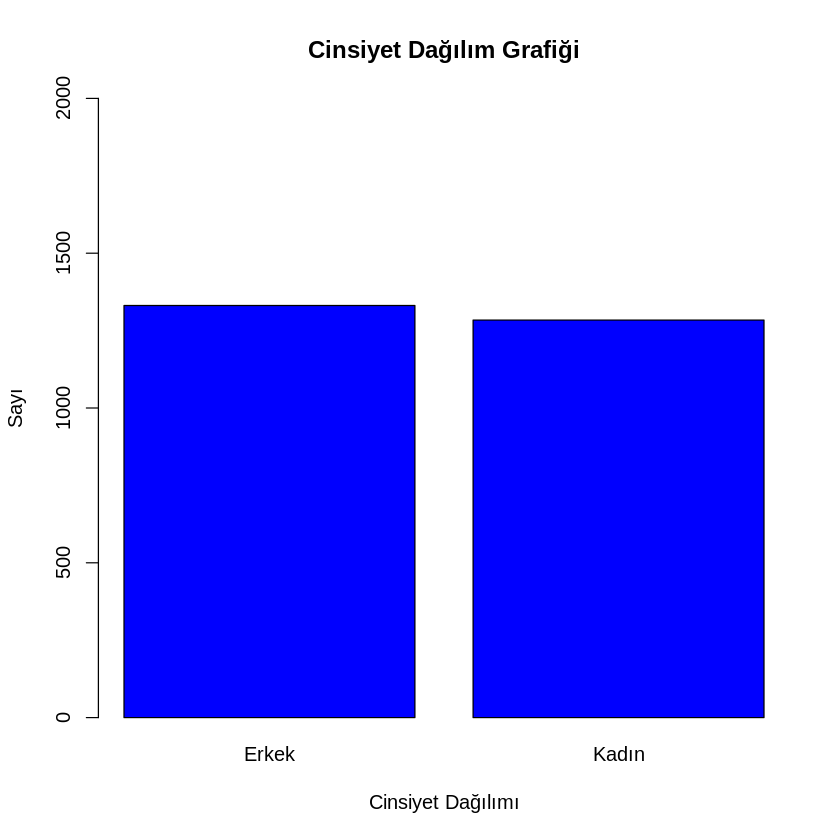

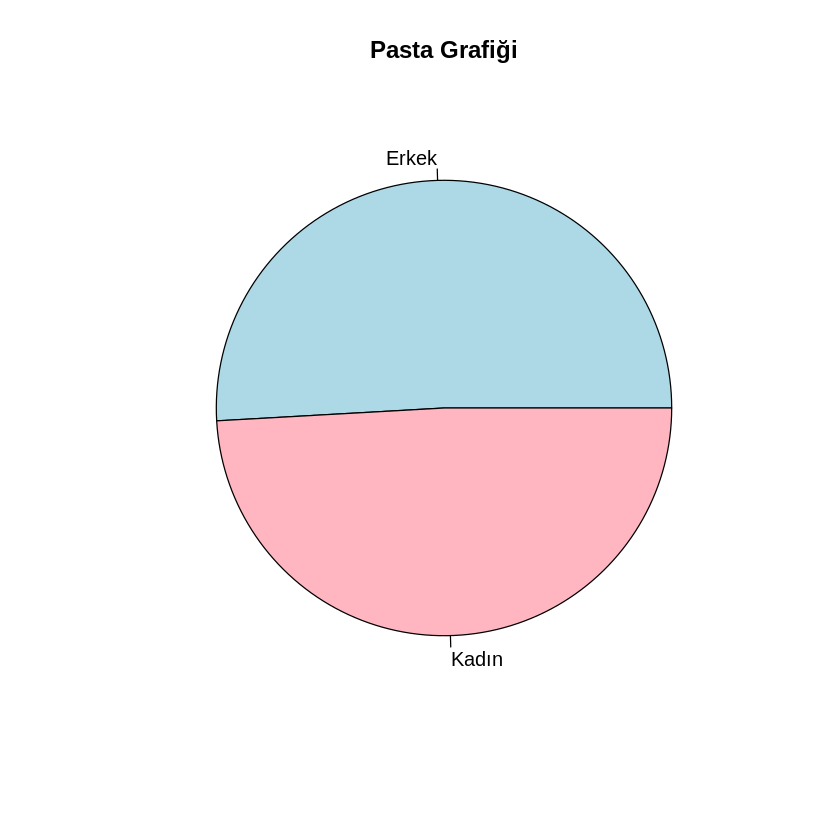

In [61]:
install.packages("haven")
library(haven)
tgss <- read_sav("/content/TGSS 2024.sav") #tgss datasını colab a dosyadan yükleyip yolu verdik

barplot(table(as_factor(tgss$gender)),
        ylim=c(0,2000),
        xlab = "Cinsiyet Dağılımı",
        ylab = "Sayı",
        col = "blue",
        main = "Cinsiyet Dağılım Grafiği")

pie(table(as_factor(tgss$gender)),
    col = c("lightblue", "lightpink"),
    main = "Pasta Grafiği")

Yukarıda colab a dosya aktarıp bunu çağırdık ama her seferinde bu dosyayı açtığımızda bunu yapmamız gerekiyor bu işlemi tekrarlamamak için ikinci bir yol var.

2. Yöntem: Google Drive'ı Bağlama (Kalıcı)
Dosyanızın her seferinde silinmemesini istiyorsanız, dosyayı Google Drive'ınıza yükleyip Colab'e bağlayabilirsiniz.

TGSS 2024.SAV dosyasını Google Drive'ınıza yükleyin.

Colab'de şu kodu çalıştırarak Drive'ınızı bağlayın:

Python

# Bu kısım Python hücresinde çalışır
from google.colab import drive
drive.mount('/content/drive')
Ardından dosya yolunu şu şekilde güncelleyin:

R

# Dosyanız Drive'ın ana dizinindeyse yol genelde şöyledir:
tgss <- read_sav("/content/drive/MyDrive/TGSS 2024.SAV")
Önemli Not: Dosya Formatı ve Kütüphane
Dosya uzantınız .SAV (SPSS dosyası) ancak siz read.csv komutunu kullanmaya çalışıyorsunuz. Eğer dosya gerçekten bir SPSS dosyasıysa read.csv hata verecektir. SPSS dosyalarını okumak için foreign veya haven kütüphanesini kullanmalısınız:

R

# haven paketi ile .sav okuma
install.packages("haven")
library(haven)
tgss <- read_sav("TGSS 2024.SAV")